In [ ]:
# unzipping dataset
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/MyDrive/FaceRecognition/archive2.zip

Streaming output truncated to the last 5000 lines.
  inflating: archive2/UTKFace/30_1_0_20170117143902329.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._30_1_0_20170117143902329.jpg.chip.jpg  
  inflating: archive2/UTKFace/41_0_0_20170116214404363.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._41_0_0_20170116214404363.jpg.chip.jpg  
  inflating: archive2/UTKFace/58_0_1_20170113193258196.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._58_0_1_20170113193258196.jpg.chip.jpg  
  inflating: archive2/UTKFace/36_1_1_20170116155035948.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._36_1_1_20170116155035948.jpg.chip.jpg  
  inflating: archive2/UTKFace/25_0_0_20170113181532013.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._25_0_0_20170113181532013.jpg.chip.jpg  
  inflating: archive2/UTKFace/66_1_0_20170110123144558.jpg.chip.jpg  
  inflating: __MACOSX/archive2/UTKFace/._66_1_0_20170110123144558.jpg.chip.jpg  
  inflating: archive2/UTKFace/40_0_1_201701

In [ ]:
# import modules
import random
import keras
from tensorflow.keras import layers
from keras.models import Sequential
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow_datasets as tfds

In [ ]:
path = "/content/archive2/UTKFace/"

training = []
count = 0
for img in os.listdir(path):
    if count % 3 == 0 and img !=".DS_Store":
      classification = img.split("_")
      category = int(classification[1])

      img_array = cv2.imread(os.path.join(path, img))
      #img_array = tf.keras.utils.load_img(os.path.join(path,img))
      #imga = img_array.resize((100,100))
      img_array = cv2.cvtColor(img_array,cv2.COLOR_RGB2BGR)
      imga = cv2.resize(img_array,dsize = (100,100), interpolation = cv2.INTER_CUBIC)
      training.append([imga, category])
    count +=1
# randomizes data
random.shuffle(training)

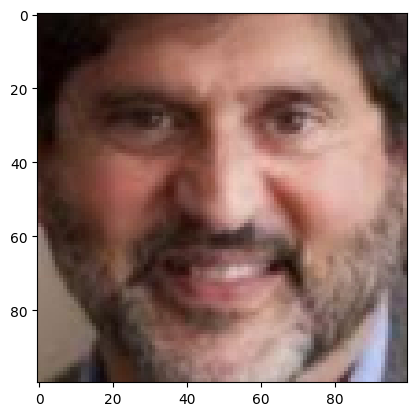

In [ ]:
plt.imshow(training[3][0])

In [ ]:
X = []
y = []

for features, label in training:
    X.append(features)
    y.append(label)

Xarray = np.array(X).reshape(-1, 100, 100, 3)
Xarray.shape
Xarraydiv = Xarray/ 255

Xarraytype = Xarraydiv.astype('float32')
nexty = np_utils.to_categorical(y,2)
print(nexty.shape)

(7903, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xarraytype,nexty,test_size = .2, random_state = 2)


In [ ]:
input_shape = (100,100,3)
model6 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.RandomFlip("horizontal"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.RandomRotation(0.1),
        layers.Conv2D(128,kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2),
        layers.Conv2D(256,kernel_size=(3,3), activation = "relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(512,kernel_size = (3,3), activation = "relu"),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(100),
        layers.Dense(2, activation="sigmoid"),
    ]
)
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

In [ ]:
batch_size = 32
epochs = 20
model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model6.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data =(X_test,y_test))

Epoch 1/20
198/198 [==============================] - 19s 26ms/step - loss: 0.6935 - accuracy: 0.5177 - val_loss: 0.6900 - val_accuracy: 0.5275
Epoch 2/20
198/198 [==============================] - 4s 22ms/step - loss: 0.6764 - accuracy: 0.5685 - val_loss: 0.6216 - val_accuracy: 0.6635
Epoch 3/20
198/198 [==============================] - 4s 21ms/step - loss: 0.6138 - accuracy: 0.6724 - val_loss: 0.5441 - val_accuracy: 0.7362
Epoch 4/20
198/198 [==============================] - 4s 20ms/step - loss: 0.5584 - accuracy: 0.7210 - val_loss: 0.5224 - val_accuracy: 0.7514
Epoch 5/20
198/198 [==============================] - 4s 20ms/step - loss: 0.5306 - accuracy: 0.7412 - val_loss: 0.4972 - val_accuracy: 0.7571
Epoch 6/20
198/198 [==============================] - 4s 21ms/step - loss: 0.5227 - accuracy: 0.7510 - val_loss: 0.4951 - val_accuracy: 0.7647
Epoch 7/20
198/198 [==============================] - 4s 23ms/step - loss: 0.4972 - accuracy: 0.7649 - val_loss: 0.4562 - val_accuracy: 0.780

In [ ]:
path = "/content/gdrive/MyDrive/GenderRecognition"
model6.save(path)